<center>
<h1><br/></h1>
<h1>INF582: INTRODUCTION TO TEXT MINING AND NLP</h1><h2>Lab Session 3: 1D-CNN</h2>
<h4>Lecture: Prof. Michalis Vazirgiannis<br>
Lab: Iakovos Evdaimon and Xiao Fei</h4>
<h5>Friday, January 24, 2025</h5>
<br>
</center>

<hr style="border:10px solid gray"> </hr>
<p style="text-align: justify;">
This handout includes theoretical introductions, <font color='blue'>coding tasks</font> and <font color='red'>questions</font>. Before the deadline, you should submit to Moodle a <B>.ipynb</B> file named <b>Lastname_Firstname.ipynb</b> containing your notebook (with the gaps filled and your answers to the questions). Your answers should be well constructed and well justified. They should not repeat the question or generalities in the handout. When relevant, you are welcome to include figures, equations and tables derived from your own computations, theoretical proofs or qualitative explanations. One submission is required for each student. The deadline for this lab is <b>January 31
, 2025 08:29 AM</b>. No extension will be granted. Late policy is as follows: ]0, 24] hours late → -5 pts; ]24, 48] hours late → -10 pts; > 48 hours late → not graded (zero).
</p>
<hr style="border:5px solid gray"> </hr>


<h3><b>1. Learning Objective</b></h2>
<p style="text-align: justify;">
In this lab, you will learn about a basic deep learning architecture for NLP: the 1D CNN.
The original papers for this model are [<a href='https://arxiv.org/abs/1412.1058'>Johnson and Zhang 2014</a>, <a href='https://arxiv.org/abs/1408.5882'>Kim 2014</a>].
We will use Python 3.6, <b>Keras</b> with <b>TensorFlow</b> as backend.

We will be performing binary classification (positive/negative) on reviews from the Internet Movie Database (IMDB) <a href='http://ai.stanford.edu/~amaas/data/sentiment/'>dataset</a>. This task is known as <i>sentiment analysis</i> or <i>opinion mining</i>.

<u>Note</u>: the documents have already been preprocessed and turned into a list of integers starting from 2.
The integers correspond to indexes in the vocabulary that has been constructed from the training set, in which the most frequent word has index 2 and 0 and 1 are reserved for the padding and out-of-vocabulary (OOV) tokens.
</p>

<h3><b>2. Loss</b></h2>
<p style="text-align: justify;">
The loss that our model will learn to <i>minimize</i> is the <i>log loss</i>, also known as the <i>cross entropy</i>.
In a binary classification setting with 0/1 classes, the log loss is defined as:

\begin{equation}
\mathrm{logloss} = -\frac{1}{N}\sum_{i=1}^{N}\big(y_{i}\mathrm{log}p_{i} + \big(1- y_{i}\big)\mathrm{log}\big(1-p_{i}\big)\big)
\end{equation}

Where $N$ is the number of training examples, $p_{i}$ is the probability assigned to class 1, $\big(1-p_{i}\big)$ is the probability assigned to class 0, and $y_{i}$ is the true label of the $i^{th}$ observation (0 or 1).
Only the term associated with the true label of each observation contributes to the overall score.
</p>

<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 1 (2 points): </b><br>
For a given observation with true label 1, compute the log loss for a confident correct prediction, an unsure correct prediction, and a strongly incorrect prediction. What do you observe?
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 1: </b><br>
Your answer here.
$$
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$
Where $y_i = 1$
$$
\text{Log Loss} = - \log(p_i)
$$

$$
p_i = 0.99
$$
$$
\text{Log Loss} = - \log(0.99) \approx 0.010
$$

$$
p_i = 0.55
$$
$$
\text{Log Loss} = - \log(0.55) \approx 0.597
$$

$$
p_i = 0.01
$$
$$
\text{Log Loss} = - \log(0.01) \approx 4.605
$$
As the probability decreases, the value of the logarithm increases

<hr style="border:10px solid green"> </hr>
</font></h4>

<h3><b>3. Model Description</b></h3>
<h4><b>3.1. Input</b></h4>
<p style="text-align: justify;">
A given document is represented as an ordered (by row) matrix $\mathbf{A} \in \mathbb{R}^{s \times d}$ of its word vectors drawn from an embedding matrix in $\mathbb{R}^{V+2 \times d}$, where $s$ is the document length($s$ is fixed at the collection level, but since the documents are of different sizes, we need to use truncation and padding.), $V$ is the size of the vocabulary, and $d$ is the dimensionality of the word embedding space.<br>
<u><b>Note</b></u>: $\mathbf{A}$ is a 1D input in the spatial sense: it has only one spatial dimension ($s$), unlike an image which has two (height and width).
The depth dimension, $d$, is called <i>channels</i> in computer vision.
<h4><b>3.2. Convolutional Layer</b></h4>
Each instantiation of a 1D window slided over the input document is convolved with $n_f$ filters of length $h$.
Each filter is parameterized by a matrix $\mathbf{W} \in \mathbb{R}^{h \times d}$, initialized randomly and learned during training.
Filters have one spatial dimension and extend fully through the depth dimension. The instantiations of the window over the input are called \textit{regions} or \textit{receptive fields}.
If we slide the window by one word at a time (stride of 1), there are $s-h+1$ receptive fields.
The output of the convolution layer for a given filter is a vector $\textbf{o} \in \mathbb{R}^{s-h+1}$, whose entries correspond to the output of the convolution of the filter with the corresponding region:

\begin{equation}
o_{i} = \mathbf{W} \cdot \mathbf{A}[i:i+h-1,:] + b_W
\end{equation}

Where $\mathbf{A}[i:i+h-1,:] \in \mathbb{R}^{h \times d}$ is the $i^{th}$ region matrix, and $\cdot$ is an operator returning the sum of the row-wise dot product of two matrices.
An illustration is given in Fig. 1.
<center>
<img width='400px' src='https://am3pap003files.storage.live.com/y4mxGPdY4NWZVQr-LNIrtJpPCXidscNsqSB8u26IQeTPqnDPBvLcjWE2SkAW63Kdgnha1_-fQ3-frSZcfilQls_c8z8SVzDVtam5r3NTx3tyb553unIHYatswhu35luuFUnl222SjDWhD0oE0x24krjBtLzDOTO48Gj53HAu8Kll4EJNlthTEFjxN7yvRkfKU8j?width=688&height=716&cropmode=none'><br>
<b>Figure 1:</b> Illustration of unidimensional convolutions. Adapted from the `Convolution Demo' section of Stanford's CS231n <a href='http://cs231n.github.io/convolutional-networks/##conv'>CNN course notes. </a><br>
</center>
</p>

<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 2 (3 points): </b><br>
What is the missing value in Fig. 1? Detail how you get your result.
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 2: </b><br>
Your answer here.

  $0*0 + 2*(-1) +2*(-1) +1 = -3$
<hr style="border:10px solid green"> </hr>
</font></h4>

Then, a nonlinear activation function $f$, such as <b>ReLU</b> ($\mathrm{max}(0,x)$) or <b>tanh</b> $\big(\frac{e^{2x}-1}{e^{2x}+1}\big)$, is applied elementwise to $\textbf{o}$, returning what is known as the <i>feature map</i> $\textbf{c} \in \mathbb{R}^{s-h+1}$ associated with the filter:

\begin{equation}
c_{i} = f(o_{i}) + b
\end{equation}
Where $b \in \mathbb{R}$ is a trainable bias.

For text, generally, $h \in [1,10]$, and $n_f \in [100,600]$ [<a href='https://www.semanticscholar.org/paper/A-Sensitivity-Analysis-of-(and-Practitioners%E2%80%99-Guide-Zhang-Wallace/06b919f865d0a0c3adbc10b3c34cbfc35fb98d43'>Zhang and Wallace, 2015</a>].
Using multiple filters allows the model to learn different, complementary features for each region.

Since each filter generates a feature map, each region is thus embedded into an $n_f$-dimensional space. Moreover, using regions of varying size around the optimal one improves performance [<a href='https://www.semanticscholar.org/paper/A-Sensitivity-Analysis-of-(and-Practitioners%E2%80%99-Guide-Zhang-Wallace/06b919f865d0a0c3adbc10b3c34cbfc35fb98d43'>Zhang and Wallace, 2015</a>]. In that case, different parallel branches are created (one for each region size), and the outputs are concatenated after pooling, as shown in Fig. 2.
<center>
<img width='500px' src='https://am3pap003files.storage.live.com/y4mt_HIa8B5fiywbHStSCyrfky2NBKYgLj9CnVJLV_hy6mQUC7A0ck7omQYG_tlwUsAU1LF9NJlJftR7w9Jqw20PFzEelDCd51wYF1BtC1CJHNlx62PWqP3RMCg3rJLNmknVm3iKFFKgBlX-xvpP0oDBfR-u6wettyvRAJvcYHuGyIld7JR4hjAFN909RRLKwaH?width=984&height=1012&cropmode=none' />
<br>
<b>Figure 2:</b>Toy example of 1D CNN architecture for document classification, with an input document of size $s=7$, word vectors of dimensionality $d=5$, 3 branches corresponding to filters of sizes $h=\big\{2,3,4\big\}$, $n_f=2$ filters per branch, $1$-max global pooling, and 2 categories. Adapted from [<a href='https://www.semanticscholar.org/paper/A-Sensitivity-Analysis-of-(and-Practitioners%E2%80%99-Guide-Zhang-Wallace/06b919f865d0a0c3adbc10b3c34cbfc35fb98d43'>Zhang and Wallace, 2015</a>]<br>
</center>
$\textbf{Pooling layer}$. The assumption is that the exact positions of the features in the input document do not matter.
What matters is only whether certain features are present or absent.
For instance, to classify a review as positive, whether ``best movie ever'' appears at the beginning or at the end of the document is not important.
To inject such robustness into the model, $\textit{global max pooling}$ is employed. This approach extracts the greatest value from each feature map and concatenates them.<br>
$\textbf{Softmax layer}.$
The final embedding of the document is passed to a softmax layer, as the task we are interested in here is classification.
The softmax outputs a $\textit{probability distribution}$ over the categories:

\begin{equation}
\mathrm{softmax}(x_{i}) = \frac{e^{x_{i}}}{\sum_{j=1}^{K}e^{x_{j}}}
\end{equation}


<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 3 (3 points): </b><br>
What other activation function could we use at the output layer? Remember that we are performing binary classification. What are the consequences in terms of number of units in the final layer?
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 3: </b><br>
Your answer here.


For a binary classification task, we can replace the Softmax activation function with a Sigmoid activation function.

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$
It outputs a probability value between 0 and 1, making it suitable for binary classification tasks.

With Softmax, the output layer has two units, one for each class. These units represent probabilities of the respective classes.

With Sigmoid, the output layer has one unit, as the sigmoid outputs the probability for one class.
<hr style="border:10px solid green"> </hr>
</font></h4>

### Importing libraries and downloading the data:

In [75]:
import csv
import json
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.models import Model
from keras import backend as K
import keras
from keras.layers import Input, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Concatenate, Dense
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")
import urllib

urllib.request.urlretrieve("https://onedrive.live.com/download?cid=AE69638675180117&resid=AE69638675180117%2199452&authkey=AIvB0sD8hYbTtIU", 'data.zip')
!unzip data.zip

Archive:  data.zip
replace __MACOSX/._data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


<b><h4><font color='blue'>
<hr style="border:10px solid blue"> </hr>
Task 1: </b><br>
Fill the gaps in the $\texttt{cnn_branch()}$ function and `defining architecture' section of the following cells to implement the model.
<hr style="border:10px solid blue"> </hr>
</font></h4>

## Functions:

In [80]:
# = = = = = functions = = = = =
def visualize_doc_embeddings(my_doc_embs,my_colors,my_labels,my_name):
    my_pca = PCA(n_components=10)
    my_tsne = TSNE(n_components=2,perplexity=10) #https://lvdmaaten.github.io/tsne/
    doc_embs_pca = my_pca.fit_transform(my_doc_embs)
    doc_embs_tsne = my_tsne.fit_transform(doc_embs_pca)

    fig, ax = plt.subplots()

    for label in list(set(my_labels)):
        idxs = [idx for idx,elt in enumerate(my_labels) if elt==label]
        ax.scatter(doc_embs_tsne[idxs,0],
                   doc_embs_tsne[idxs,1],
                   c = my_colors[label],
                   label=str(label),
                   alpha=0.7,
                   s=40)

    ax.legend(scatterpoints=1)
    fig.suptitle('t-SNE visualization doc embeddings',fontsize=15)
    fig.set_size_inches(11,7)
    fig.savefig(my_name + '.pdf')


### fill the gap in the cnn_branch function below ###
### add a convolutional and a pooling layer ###
# conv layers: https://keras.io/layers/convolutional/
# pooling layers: https://keras.io/layers/pooling/
# layers can be combined by nesting them as: layer_b(parameters_b)(layer_a(parameters_a)(input))

def cnn_branch(n_filters, k_size, d_rate, my_input, my_activation):
    return Dropout(d_rate)(
        GlobalMaxPooling1D()(
            Conv1D(filters=n_filters, kernel_size=k_size, activation=my_activation, padding='same')(my_input)
        )
    )


## Loading The Data:

In [81]:
# = = = = = parameters = = = = =

mfw_idx = 2 # index of the most frequent words in the dictionary
padding_idx = 0
oov_idx = 1

d = 30 # dimensionality of word embeddings
max_size = 60 # max allowed size of a document
nb_branches = 2
nb_filters = 50
filter_sizes = [3,4]
drop_rate = 0.3 # amount of dropout regularization
batch_size = 64
nb_epochs = 2
my_optimizer = 'adam'

# = = = = = loading data = = = = =

# load dictionary of word indexes (sorted by decreasing frequency across the corpus)
with open('./data/word_to_index.json', 'r') as my_file:
    word_to_index = json.load(my_file)

# invert mapping (for sanity checking, later)
index_to_word = dict((v,k) for k,v in word_to_index.items())

with open('./data/training.csv', 'r') as my_file:
    reader = csv.reader(my_file, delimiter=',')
    x_train = list(reader)

with open('./data/test.csv', 'r') as my_file:
    reader = csv.reader(my_file, delimiter=',')
    x_test = list(reader)

with open('./data/training_labels.txt', 'r') as my_file:
    y_train = my_file.read().splitlines()

with open('./data/test_labels.txt', 'r') as my_file:
    y_test = my_file.read().splitlines()

# turn lists of strings into lists of integers
x_train = [[int(elt) for elt in sublist] for sublist in x_train]
x_test = [[int(elt) for elt in sublist] for sublist in x_test]

y_train = [int(elt) for elt in y_train]
y_test = [int(elt) for elt in y_test]

print('data loaded')

# = = some sanity checking = =

print('index of "the":',word_to_index['the']) # most frequent word
print('index of "movie":',word_to_index['movie']) # very frequent word
print('index of "elephant":',word_to_index['elephant']) # less frequent word

# reconstruct first review
rev = x_train[0]
print (' '.join([index_to_word[elt] if elt in index_to_word else 'OOV' for elt in rev]))
# compare it with the original review: https://www.imdb.com/review/rw2219371/?ref_=tt_urv

# = = = = = truncation and padding = = = = =

# truncate reviews longer than 'max_size'
x_train = [rev[:max_size] for rev in x_train]
x_test = [rev[:max_size] for rev in x_test]

# pad reviews shorter than 'max_size' with the special padding token
x_train = [rev+[padding_idx]*(max_size-len(rev)) if len(rev)<max_size else rev for rev in x_train]
x_test = [rev+[padding_idx]*(max_size-len(rev)) if len(rev)<max_size else rev for rev in x_test]

# all reviews should now be of size 'max_size'
assert max_size == list(set([len(rev) for rev in x_train]))[0] and max_size == list(set([len(rev) for rev in x_test]))[0]

print('truncation and padding done')

data loaded
index of "the": 2
index of "movie": 20
index of "elephant": 4491
oh dear ! what a disappointment . i've been watching old westerns on british tv for decades , and i wasn't aware of this one until its showing yesterday - most other scott westerns come around every few years or so and are usually worth watching again.the rich colour and outdoor sets were good , but that's all i can say about this film . i have to agree with most of the other negative comments already made . several times i felt like turning it off , and finally i did , halfway through , something i hardly ever OOV seemed unusually OOV in charming the girls , his two sidekicks were annoying and so was the mexican bandit lad . and i've a feeling the army uniforms were 20 years or so too modern , not that this has bothered makers of many other OOV it got better in the second half , but i couldn't be bothered to wait and see .
truncation and padding done


## Defining Architecture:

In [85]:
# = = = = = defining architecture = = = = =

# see guide to Keras' functional API: https://keras.io/getting-started/functional-api-guide/
# core layers: https://keras.io/layers/core/

doc_ints = Input(shape=(max_size,))

vocab_size = len(word_to_index) + 1
doc_wv = Embedding(input_dim=vocab_size, output_dim=d, input_length=max_size)(doc_ints) ### fill the gap (add an Embedding layer) https://keras.io/layers/embeddings/ ###

doc_wv_dr = Dropout(drop_rate)(doc_wv)

branch_outputs = []
for idx in range(nb_branches):
    ### fill the gap (use the cnn_branch function) ###
    branch_output = cnn_branch(n_filters=nb_filters, k_size=filter_sizes[idx], d_rate=drop_rate,
                               my_input=doc_wv_dr, my_activation='relu')
    branch_outputs.append(branch_output)

concat = Concatenate()(branch_outputs) # branch output combination

preds = Dense(units=1, activation='sigmoid')(concat)  ### fill the gap (add a Dense layer) https://keras.io/layers/core/ ###

model = Model(doc_ints,preds)

### fill the gap (call the compile method on model) https://keras.io/models/sequential/ ###
### specific the loss, optimizer, and metrics arguments ###
### use the accuracy as metric ###
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('model compiled')

model.summary()

print('total number of model parameters:',model.count_params())

model compiled


Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 60)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_11 (Embedding)  │ (None, 60, 30)         │        622,710 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_33 (Dropout)      │ (None, 60, 30)         │              0 │ embedding_11[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_22 (Conv1D)        │ (None, 60, 50)         │          4,550 │ dropout_33[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_23 (Conv1D)        │ (None, 60, 50)         │          6,050 │ dropout_33[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_22   │ (None, 50)             │              0 │ conv1d_22[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_23   │ (None, 50)             │              0 │ conv1d_23[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_34 (Dropout)      │ (None, 50)             │              0 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 50)             │              0 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_11            │ (None, 100)            │              0 │ dropout_34[0][0],      │
│ (Concatenate)             │                        │                │ dropout_35[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │            101 │ concatenate_11[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 633,411 (2.42 MB)

 Trainable params: 633,411 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

total number of model parameters: 633411


<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 4 (4 points): </b><br>
What is the formula for the total number of trainable parameters of the model, assuming that we use one branch with filters of size $h$, the word embeddings are updated during training, and we perform binary classification?
Do not give a number, but a formula using the variables that have been defined in the current section.
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 4: </b><br>
Your answer here.

*   V: Vocabulary size.
*   d: Embedding dimension.
*   h: Filter size (height of the kernel).
*   f: Number of filters.
$$ param = (V*d) + (f*(d*h+1)) + (f + 1)$$
<hr style="border:10px solid green"> </hr>
</font></h4>

<h3><b>4. Visualizing and understanding inner representations and predictions</b></h2>
<h4><b>4.1. Document embeddings</b></h4>
<p style="text-align: justify;">
An easy way to verify that our model is effectively learning is to check whether its internal document representations make sense.
Recall that the feature vector which is fed to the softmax layer can be seen as an $n_f$-dimensional embedding of the input document.

<b><h4><font color='blue'>
<hr style="border:10px solid blue"> </hr>
Task 2: </b><br>
Fill the gaps in the `visualizing doc embeddings' section to extract the internal document representations of the model.
<hr style="border:10px solid blue"> </hr>
</font></h4>
</p>

plotting embeddings of first 1000 documents
Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5710 - loss: 0.6655 - val_accuracy: 0.7398 - val_loss: 0.5193
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7735 - loss: 0.4841 - val_accuracy: 0.7538 - val_loss: 0.4931
Plotting embeddings of first 1000 documents (after training)


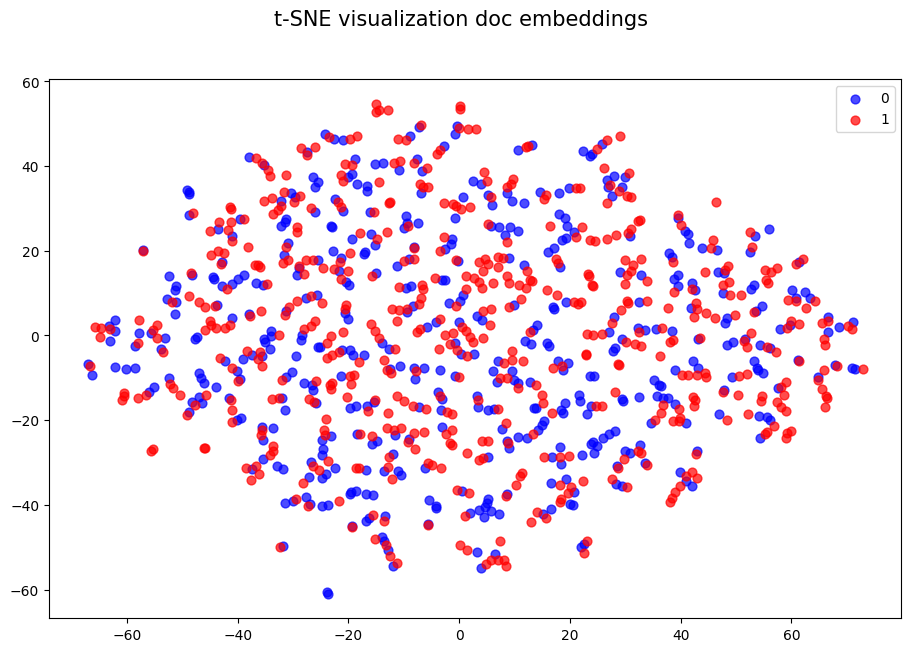

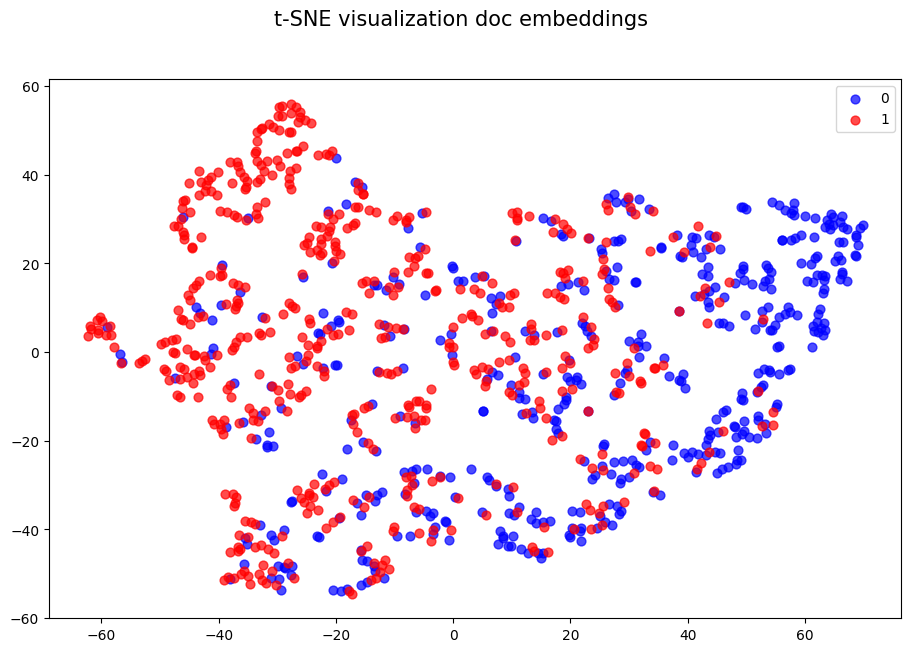

In [86]:
# = = = = = visualizing doc embeddings (before training) = = = = =

### fill the gap ###
### create a K.function 'get_doc_embedding()' that returns the inner representation of the model before the prediction layer ###
### this function should take as input the input of the model and return the output of the penultimate layer ###
### you can access the layers of the model with model.layers ###
### a specific layer can then be accessed via its index, e.g., model.layers[0] ###
### the indexes of the layers can be inferred by calling model.summary() ###
### the input and output of a given layer can be accessed via, e.g., model.layers[0].input and model.layers[0].output ###
### see: How can I obtain the output of an intermediate layer? here: https://www.tensorflow.org/api_docs/python/tf/keras/Model ###

get_doc_embedding = Model(inputs=model.input, outputs=model.layers[-2].output)

n_plot = 1000
labels_plt = y_test[:n_plot]
doc_embs = get_doc_embedding(np.array(x_test[:n_plot]))


print('plotting embeddings of first',n_plot,'documents')
visualize_doc_embeddings(doc_embs,['blue','red'],labels_plt,'before')

# = = = = = training = = = = =

model.fit(tf.convert_to_tensor(x_train),
          tf.convert_to_tensor(y_train),
          batch_size = batch_size,
          epochs = nb_epochs,
          validation_data = (tf.convert_to_tensor(x_test), tf.convert_to_tensor(y_test)))

# = = = = = visualizing doc embeddings (after training) = = = = =

### fill the gaps ###
### perform the same steps as before training and observe the changes ###
# Get embeddings after training
doc_embs_after = get_doc_embedding(np.array(x_test[:n_plot]))

# Plot embeddings after training
print('Plotting embeddings of first', n_plot, 'documents (after training)')
visualize_doc_embeddings(doc_embs_after, ['blue', 'red'], labels_plt, 'after')


<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 5 (3 points): </b><br>
Interpret your figures of the document embeddings before and after training.
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 5: </b><br>
Your answer here.


before training the dots are located randomly, after two epochs we see that the red dots are clustered on the left in the corner, and the blue ones on the right in the corner
<hr style="border:10px solid green"> </hr>
</font></h4>

<h4><b>4.2. Predictive regions identification</b></h4>
<p style="text-align: justify;">
This approach is presented in section 3.6 (Tables 5 & 6) of [<a href='https://arxiv.org/abs/1412.1058'>Johnson and Zhang, 2014</a>].
Recall that before we lose positional information by applying pooling, each of the $n_f$ filters of size $h$ is associated with a vector of size $s-h+1$ (a feature map) whose entries represent the output of the convolution of the filter with the corresponding receptive field in the input, after application of the nonlinearity and addition of the bias.
Therefore, each receptive field is embedded into an $n_f$-dimensional space.
Thus, after training, we can identify the regions of a given document that are the most predictive of its category by finding the fields that have the highest norms.
For instance, some of the most predictive regions for negative IMDB reviews are: ``worst movie ever'', ``don't waste your money'', ``poorly written and acted'', ``awful picture quality''. Conversely, some regions very indicative of positivity are: ``amazing soundtrack'', ``visually beautiful'', ``cool journey'', ``ending quite satisfying''...

<b><h4><font color='blue'>
<hr style="border:10px solid blue"> </hr>
Task 3: </b><br>
Fill the gaps in the `predictive text regions' section to identify predictive regions.
<hr style="border:10px solid blue"> </hr>
</font></h4>
</p>

In [87]:
# = = = = = predictive text regions for the first branch = = = = =

### fill the gaps ###
### define a K.function 'get_region_embedding' that returns the feature maps of the first branch ###

get_region_embedding = keras.Model(
    inputs=model.input,
    outputs=model.layers[4].output  # Adjust this to match the output layer of the first branch
)

my_review_text = 'Oh , god , this was such a disappointment ! Worst movie ever . Not worth the 15 bucks .'
tokens = my_review_text.lower().split()
my_review = [word_to_index[elt] for elt in tokens]
my_review = [my_review+[padding_idx]*(max_size-len(my_review))]
# extract regions (sliding window over text)
regions = []
regions.append(' '.join(tokens[:filter_sizes[0]]))
for i in range(filter_sizes[0], len(tokens)):
    regions.append(' '.join(tokens[(i-filter_sizes[0]+1):(i+1)]))

my_review = np.array(my_review)

reg_emb = get_region_embedding(my_review)[0,:,:]

### fill the gap ###
### compute the norms of the region embeddings ###
### you may use np.linalg.norm() https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html ###
norms = np.linalg.norm(reg_emb, axis=1)

# Display regions with their norms in descending order
sorted_regions = [
    list(zip(regions, norms[: len(regions)]))[idx]
    for idx in np.argsort(-norms[: len(regions)]).tolist()
]
print(sorted_regions)

print([list(zip(regions,norms[:len(regions)]))[idx] for idx in np.argsort(-norms[:len(regions)]).tolist()])


[('! worst movie', 2.47994), ('disappointment ! worst', 2.391639), ('movie ever .', 1.5204686), ('such a disappointment', 1.3453778), ('worst movie ever', 1.119218), ('a disappointment !', 1.1088027), (', god ,', 0.60948265), ('oh , god', 0.5879388), (', this was', 0.35602584), ('was such a', 0.31341258), ('this was such', 0.23749916), ('15 bucks .', 0.18789898), ('god , this', 0.16567409), ('ever . not', 0.13715154), ('the 15 bucks', 0.13048293), ('worth the 15', 0.086984105), ('. not worth', 0.077159576), ('not worth the', 0.075282566)]
[('! worst movie', 2.47994), ('disappointment ! worst', 2.391639), ('movie ever .', 1.5204686), ('such a disappointment', 1.3453778), ('worst movie ever', 1.119218), ('a disappointment !', 1.1088027), (', god ,', 0.60948265), ('oh , god', 0.5879388), (', this was', 0.35602584), ('was such a', 0.31341258), ('this was such', 0.23749916), ('15 bucks .', 0.18789898), ('god , this', 0.16567409), ('ever . not', 0.13715154), ('the 15 bucks', 0.13048293), ('w

<h4><b>4.3. Saliency maps</b></h4>
<p style="text-align: justify;">
Another way to understand how the model is issuing its predictions was described by [<a href='https://arxiv.org/abs/1312.6034'>Simonyan et al., 2013</a>] and applied to NLP by [<a href='https://arxiv.org/abs/1506.01066'>Li et al., 2015</a>].
The idea is to rank the elements of the input document $A \in \mathbb{R}^{s \times d}$ based on their influence on the prediction.
An approximation can be given by the magnitudes of the first-order partial derivatives of the output of the model $\mathrm{CNN}: A \mapsto \mathrm{CNN}(A)$ with respect to each row $a$ of $A$:

\begin{equation}
\mathrm{saliency}(a)=\big |{\frac{\partial(\mathrm{CNN})}{\partial a}\mid_a \big |}
\end{equation}

The interpretation is that we identify which words in $A$ $\textit{need to be changed the least to change the class score the most}$.
The derivatives can be obtained by performing a single back-propagation pass (based on the prediction, not the loss).


<b><h4><font color='blue'>
<hr style="border:10px solid blue"> </hr>
Task 4: </b><br>
Fill the gaps in the `saliency map` section to implement the method described above.
<hr style="border:10px solid blue"> </hr>
</font></h4>
</p>

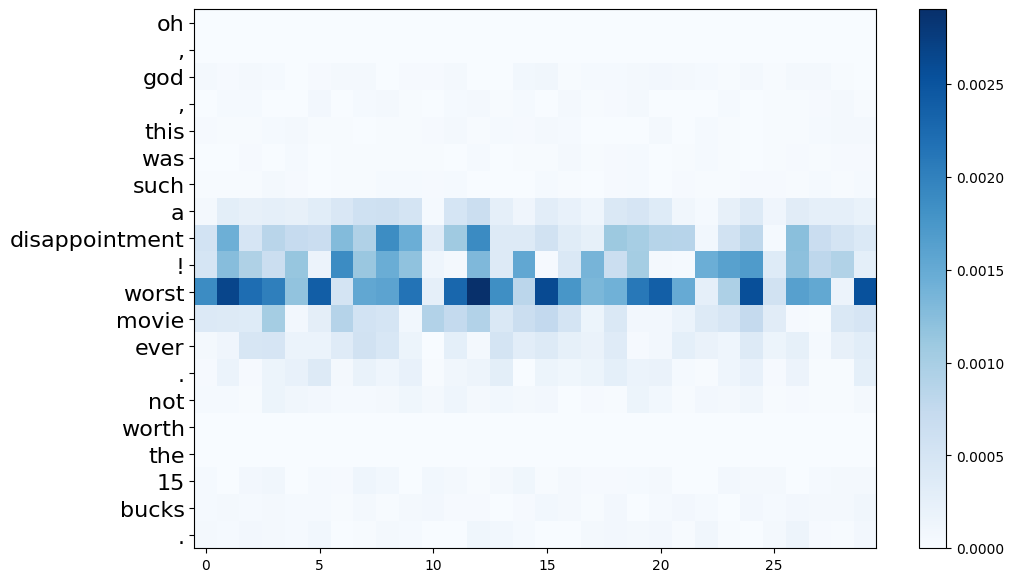

In [88]:
# = = = = = saliency map = = = = =

input_tensors = [model.input]

saliency_input = model.layers[1].output  # Embedding matrix output (adjust the index to your model's structure)
saliency_output = model.output ### fill the gap (get the probability distribution over classes from the model) ###

get_input = keras.Model(inputs=input_tensors, outputs=[saliency_input])
get_output = keras.Model(inputs=[saliency_input], outputs=[saliency_output])


with tf.GradientTape() as tape:
    x = get_input(my_review)
    tape.watch(x)
    y = get_output(x)
    matrix = tape.gradient(y, x)[0][:len(tokens)]

### fill the gap (compute the magnitude of the partial derivatives) ###
### you may use np.absolute https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html ###
to_plot = np.absolute(matrix)

fig, ax = plt.subplots()
heatmap = ax.imshow(to_plot, cmap=plt.cm.Blues, interpolation='nearest',aspect='auto')
ax.set_yticks(np.arange(len(tokens)))
ax.set_yticklabels(tokens)
ax.tick_params(axis='y', which='major', labelsize=32*10/len(tokens))
fig.colorbar(heatmap)
fig.set_size_inches(11,7)
fig.savefig('saliency_map.pdf',bbox_inches='tight')
fig.show()


<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 6 (2 points): </b><br>
Briefly interpret your saliency map.
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 6: </b><br>
Your answer here.


Words with high impact are highlighted in a darker color, for example:
"worst" "disappointment"
These are words with a clearly negative sentiment that the model could consider as key to determining the negative rating of the text.

<hr style="border:10px solid green"> </hr>
</font></h4>

<b><h4><font color='red'>
<hr style="border:10px solid red"> </hr>
Question 7 (3 points): </b><br>
What are some limitations of the CNN model?
<hr style="border:10px solid red"> </hr>
</font></h4>


<b><h4><font color='green'>
<hr style="border:10px solid green"> </hr>
Answer 7: </b><br>
Your answer here.


*   Limited Contextual Understanding. CNNs rely on fixed-size filters (kernels) to capture local patterns, such as n-grams.
*   CNNs do not inherently account for the sequential nature of text. They treat text as a spatial structure (like images) rather than a sequence.
*  While CNNs with pooling layers can reduce the dimensionality and highlight key features, pooling often loses information about the global context of the input.



<hr style="border:10px solid green"> </hr>
</font></h4>